In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
import datetime
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [4]:
stock = 'GOOG'

In [5]:
dataset = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [6]:
dataset.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2006-01-18,10.998723,11.306503,10.957686,11.057807,822499417
2006-01-19,10.789580,11.210830,10.704292,11.153476,583671575
2006-01-20,9.875143,10.878083,9.758459,10.845204,1650832619
2006-01-23,10.568326,10.590328,10.030146,10.070936,913065614
2006-01-24,10.952246,10.999710,10.740879,10.779197,620902605


In [7]:
dataset.columns = dataset.columns.droplevel(1)

In [8]:
dataset.shape

(5032, 5)

In [9]:
dataset.describe()

Price,Close,High,Low,Open,Volume
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,59.244546,59.861441,58.603936,59.216926,8.787858e+07
std,59.656905,60.320195,58.968339,59.622779,1.101942e+08
min,6.364233,6.659158,6.113560,6.489570,1.584340e+05
25%,14.412477,14.552956,14.290231,14.459386,2.505150e+07
50%,35.264761,35.638585,34.890963,35.180640,4.163040e+07
75%,88.114008,88.969715,87.109171,88.060910,1.090181e+08
max,336.429993,341.200012,334.350006,338.054993,1.650833e+09


In [10]:
dataset.isnull().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2006-01-18 to 2026-01-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5032 non-null   float64
 1   High    5032 non-null   float64
 2   Low     5032 non-null   float64
 3   Open    5032 non-null   float64
 4   Volume  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

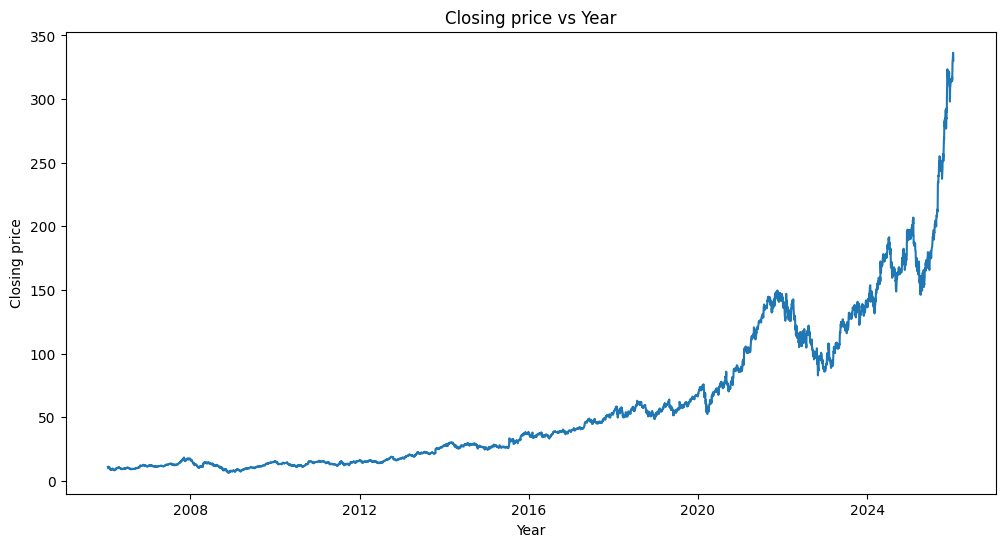

In [13]:
plt.figure(figsize=(12,6))
plt.plot(dataset['Close'])
plt.xlabel("Year")
plt.ylabel("Closing price")
plt.title("Closing price vs Year")
plt.show()

In [14]:
def plot_graph(figsize,values,col_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("Years")
    plt.ylabel(col_name)
    plt.title(f"{col_name} of google data" )
    plt.show()

In [15]:
dataset.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

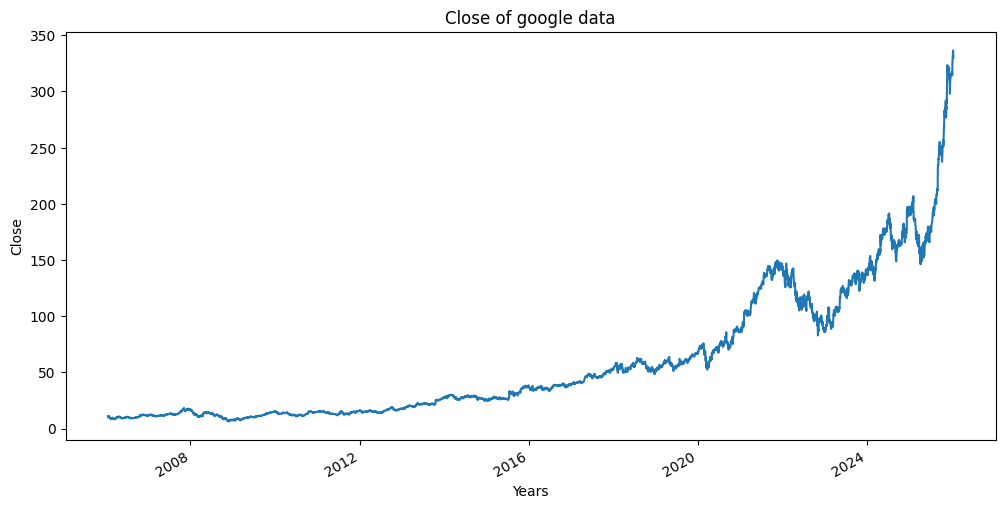

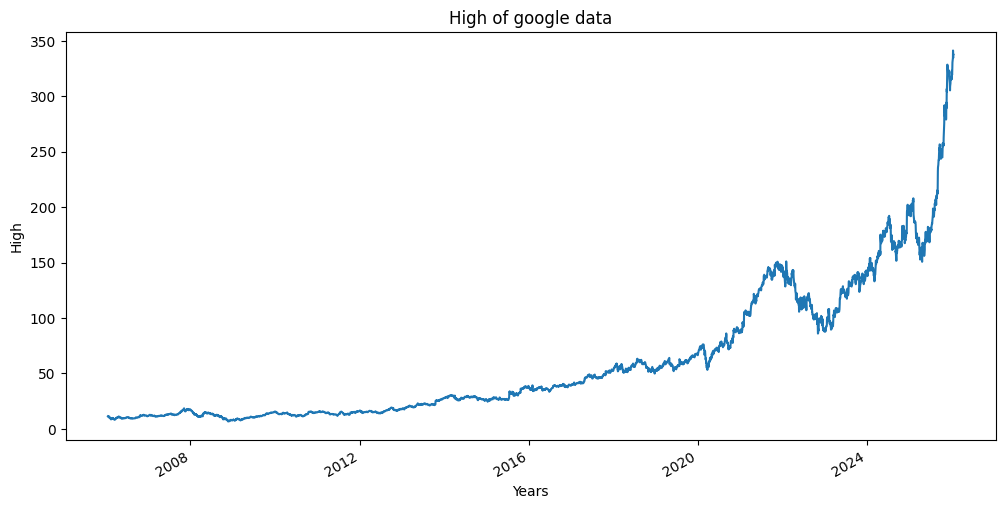

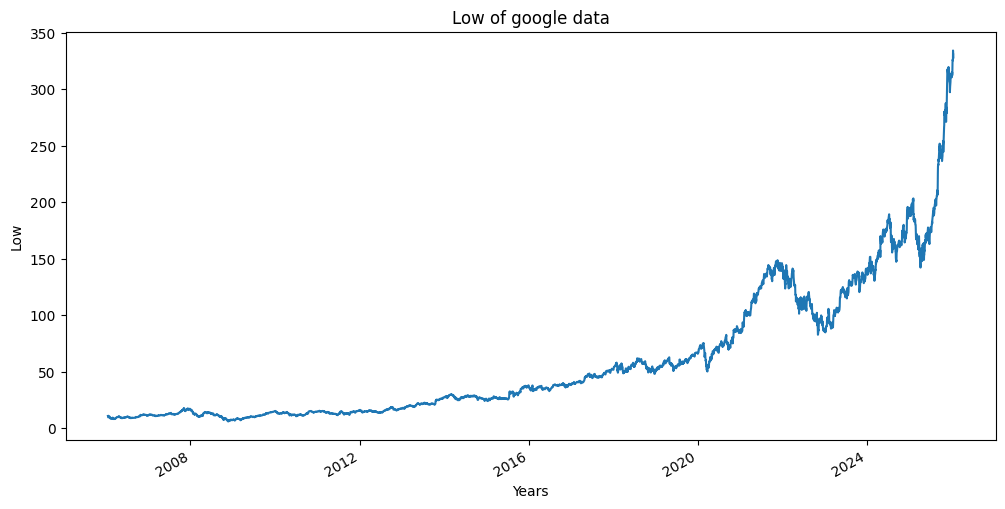

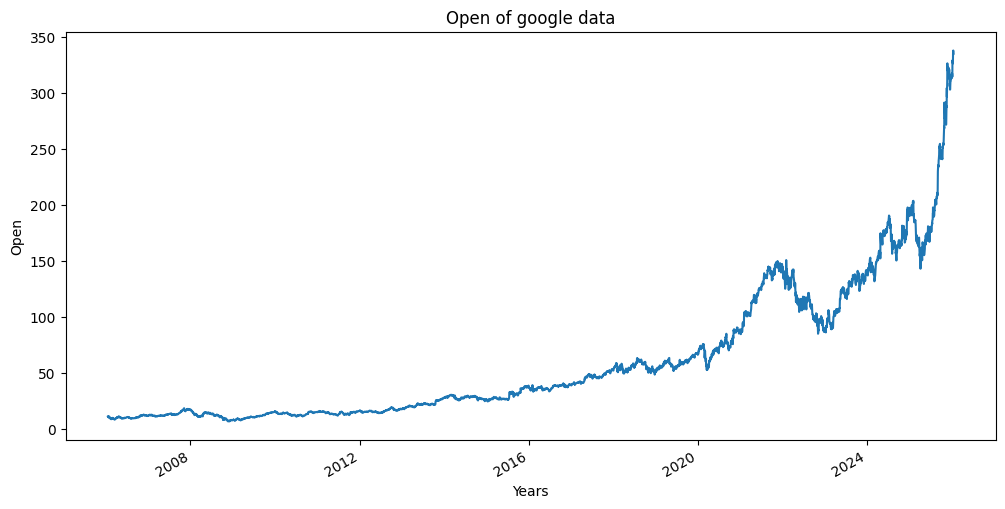

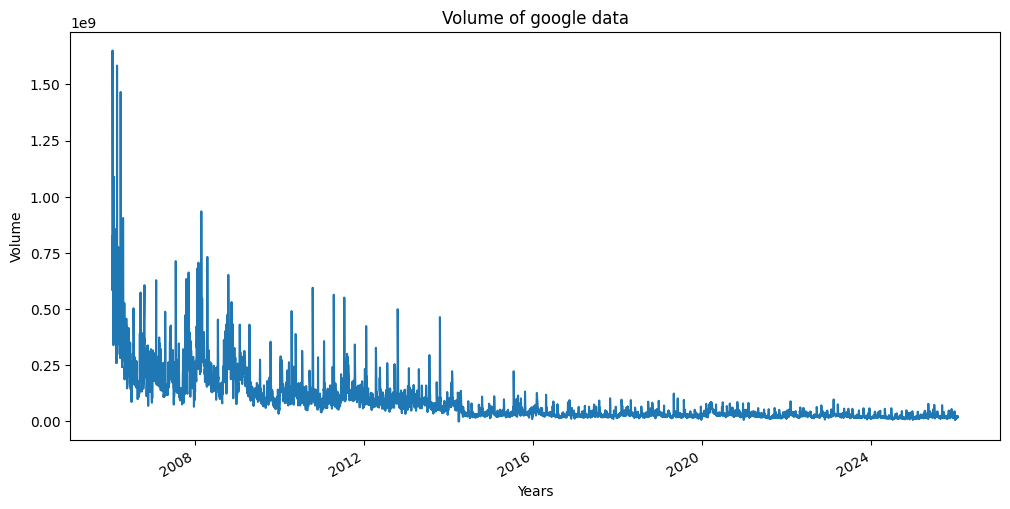

In [16]:
for column in dataset.columns:
    plot_graph((12,6),dataset[column],column)

In [17]:
for i in range(2008,2024):
    print(i,list(dataset.index.year).count(i))

2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [18]:
values = [253,252,252,252,250,252,252,252,252,251,251,252,253,252,251,250]
mean = sum(values)/len(values)
print(mean)

251.6875


In [19]:
dataset['MA_for_251_days'] = dataset['Close'].rolling(251).mean()

In [20]:
dataset

Price,Close,High,Low,Open,Volume,MA_for_251_days
Date,,,,,,
2006-01-18,10.998723,11.306503,10.957686,11.057807,822499417,NaN
2006-01-19,10.789580,11.210830,10.704292,11.153476,583671575,NaN
2006-01-20,9.875143,10.878083,9.758459,10.845204,1650832619,NaN
2006-01-23,10.568326,10.590328,10.030146,10.070936,913065614,NaN
2006-01-24,10.952246,10.999710,10.740879,10.779197,620902605,NaN
...,...,...,...,...,...,...
2026-01-12,332.730011,334.440002,325.510010,326.500000,23893800,215.236328
2026-01-13,336.429993,341.200012,334.350006,335.279999,24616700,215.813561
2026-01-14,336.309998,337.029999,331.140015,334.984985,17839300,216.395238


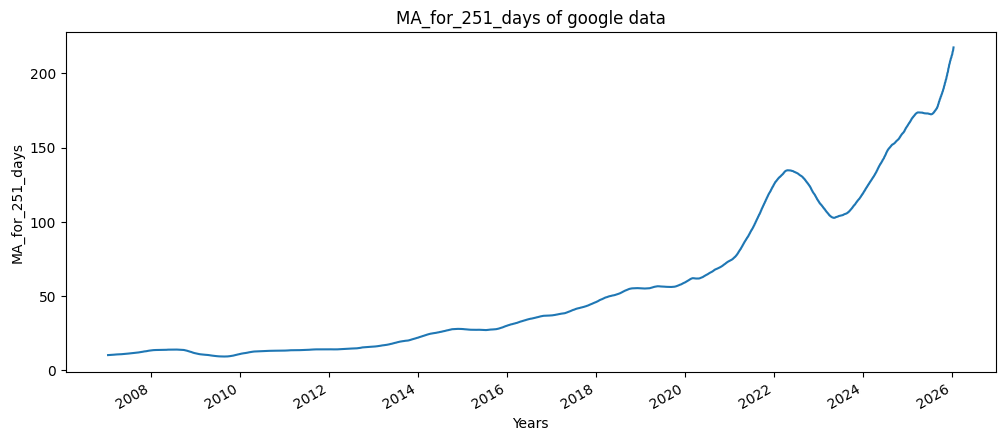

In [21]:
plot_graph((12,5),dataset['MA_for_251_days'],'MA_for_251_days')